<a href="https://colab.research.google.com/github/zoraizmohammad/optics-modern-notebook/blob/main/lab3-blackbody/physics264prelab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Constants

In [6]:
h = 6.626e-34  # Planck's constant (J*s)
c = 3.0e8      # Speed of light (m/s)
kB = 1.38e-23  # Boltzmann constant (J/K)
T = 3000  # Kelvin

Function to calculate blackbody radiation intensity

In [3]:
def blackbody_spectrum(wavelength_nm, T):
    wavelength_m = wavelength_nm * 1e-9  # Convert nm to meters
    intensity = (2 * np.pi * h * c**2) / (wavelength_m**5 * (np.exp(h * c / (wavelength_m * kB * T)) - 1))
    return intensity

Function to load filter transmission data

In [4]:
def load_filter_data(filename):
    data = np.loadtxt(filename)
    wavelength = data[:, 0]  # First column: wavelength in nm
    transmission = data[:, 1]  # Second column: transmission value
    return wavelength, transmission

Apply filter transmission

In [5]:
def apply_filter(wavelength, intensity, transmission):
    return intensity * transmission

Calculations on wavelenght range and intensities

In [12]:
wavelengths = np.linspace(300, 1100, 1000)  # nm
intensities = blackbody_spectrum(wavelengths, T)

Load Data

In [15]:
internals = {"Red": "/content/drive/MyDrive/phy264/lab3info/Basler_red.txt", "Green": "/content/drive/MyDrive/phy264/lab3info/Basler_green.txt", "Blue": "/content/drive/MyDrive/phy264/lab3info/Basler_blue.txt"}
externals = {"Red": "/content/drive/MyDrive/phy264/lab3info/FB650-40.txt", "Green": "/content/drive/MyDrive/phy264/lab3info/FB550-40.txt", "Blue": "/content/drive/MyDrive/phy264/lab3info/FB450-40.txt"}

filtered_spectra = {}

Apply Filters

In [17]:
for color in ["Red", "Green", "Blue"]:
    try:
        w_cam, T_cam = load_filter_data(internals[color])
        w_ext, T_ext = load_filter_data(externals[color])

        # Interpolate transmissions to match common wavelength scale
        T_cam_interp = np.interp(wavelengths, w_cam, T_cam)
        T_ext_interp = np.interp(wavelengths, w_ext, T_ext)

        # Total transmission
        T_total = T_cam_interp * T_ext_interp

        # Apply total transmission
        filtered_spectra[color] = apply_filter(wavelengths, intensities, T_total)
    except:
        print(f"fix")

Plotting

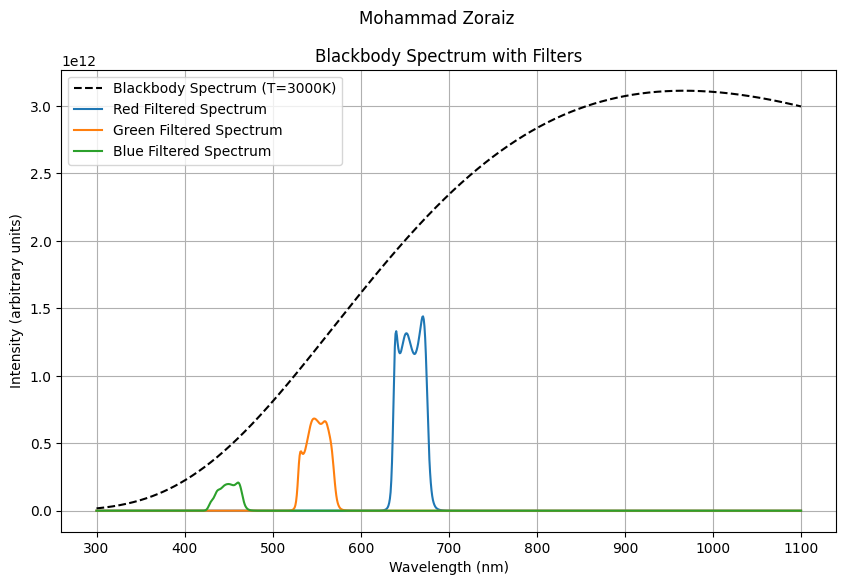

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, intensities, label='Blackbody Spectrum (T=3000K)', linestyle='dashed', color='black')

for color in filtered_spectra:
    plt.plot(wavelengths, filtered_spectra[color], label=f'{color} Filtered Spectrum')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.title('Blackbody Spectrum with Filters')
plt.suptitle('Mohammad Zoraiz')
plt.legend()
plt.grid()
plt.show()